<a href="https://colab.research.google.com/github/leticiaram/Modelos_Estocasticos_2023/blob/main/Codigo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código 1

# Muestreo

In [71]:
import random

## Con reemplazo

Generate n samples from a sequence with the possibility of repetition. Sample with replacement

In [86]:
random.seed(1)
seq = range(10)
n = 20
sample_wr = random.choices(seq, k=n)

In [87]:
sample_wr

[1, 8, 7, 2, 4, 4, 6, 7, 0, 0, 8, 4, 7, 0, 4, 7, 2, 9, 9, 0]

## Sin Reemplazo

Generate n unique samples (multiple items) from a sequence without repetition. Here, A seq can be a list, set, string, tuple. Sample without replacement.

In [80]:
random.seed(10)
seq = range(30)
n = 20
sample_wtr = random.sample(seq, n)

In [81]:
sample_wtr

[18, 1, 13, 15, 29, 0, 6, 14, 26, 8, 5, 28, 16, 21, 10, 25, 3, 11, 19, 24]

# Variables aleatorias discretas

## Distribución Binomial

In [96]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

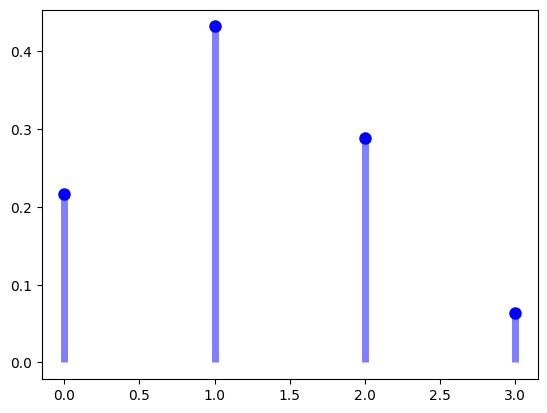

In [102]:
n, p = 3, 0.4
x = np.arange(0,n+1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

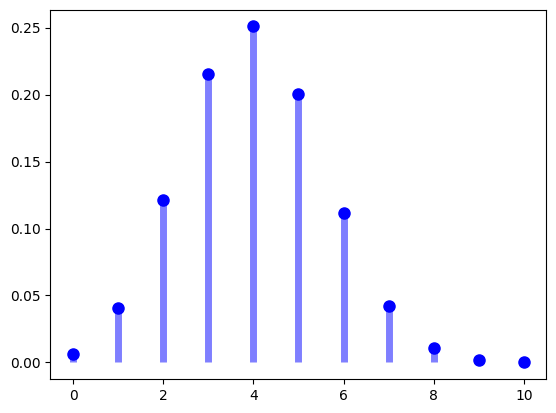

In [103]:
n, p = 10, 0.4
x = np.arange(0,n+1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)


## Distribución Poisson



In [ ]:
#import pandas as pd
#import scipy.stats as stats
#import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [3]:
k = np.arange(0, 17)
print(k)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


### Función de Densidad de Probabilidad (Probability Mass Function, PMS)


In [4]:
pmf = poisson.pmf(k, mu=7)
pmf = np.round(pmf, 5)
print(pmf)

[0.00091 0.00638 0.02234 0.05213 0.09123 0.12772 0.149   0.149   0.13038
 0.1014  0.07098 0.04517 0.02635 0.01419 0.00709 0.00331 0.00145]


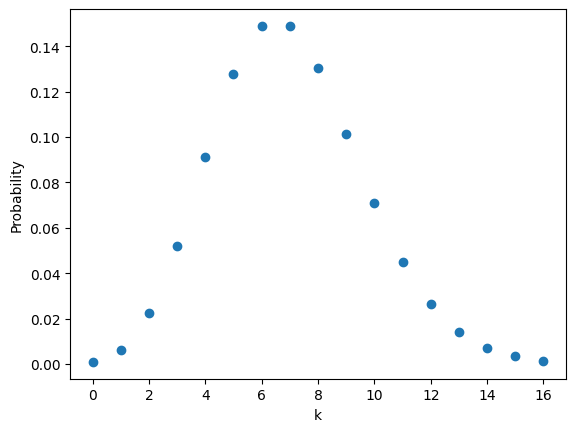

In [64]:
plt.plot(k, pmf,'o')
plt.xlabel('k')
plt.ylabel('Probability')

plt.show()

In [60]:
my_list = []
for i in range(len(k)):
  my_list.append([(k[i], 0), (k[i], pmf[i])])
print(my_list)

[[(0, 0), (0, 0.00091)], [(1, 0), (1, 0.00638)], [(2, 0), (2, 0.02234)], [(3, 0), (3, 0.05213)], [(4, 0), (4, 0.09123)], [(5, 0), (5, 0.12772)], [(6, 0), (6, 0.149)], [(7, 0), (7, 0.149)], [(8, 0), (8, 0.13038)], [(9, 0), (9, 0.1014)], [(10, 0), (10, 0.07098)], [(11, 0), (11, 0.04517)], [(12, 0), (12, 0.02635)], [(13, 0), (13, 0.01419)], [(14, 0), (14, 0.00709)], [(15, 0), (15, 0.00331)], [(16, 0), (16, 0.00145)]]


In [ ]:
import pylab as pl
from matplotlib import collections  as mc

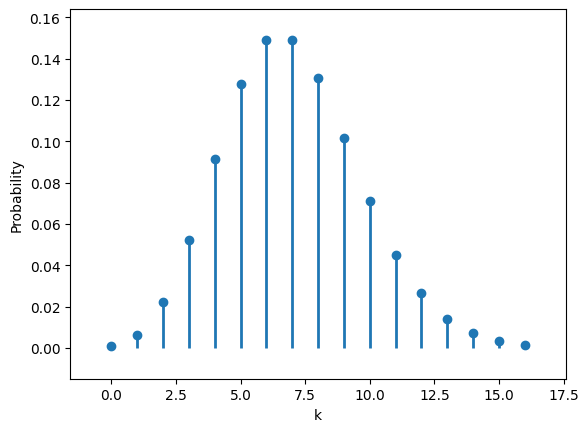

In [62]:
lc = mc.LineCollection(my_list, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
plt.plot(k, pmf,'o')
plt.xlabel('k')
plt.ylabel('Probability')
ax.autoscale()
ax.margins(0.1)

### Función de Distribución (Cumulative Distribution Function)

In [45]:
cdf = poisson.cdf(k, mu=7)
cdf = np.round(cdf, 3)

print(cdf)

[0.001 0.007 0.03  0.082 0.173 0.301 0.45  0.599 0.729 0.83  0.901 0.947
 0.973 0.987 0.994 0.998 0.999]


In [53]:
my_list_cdf = []
for i in range(len(k)-1):
  my_list_cdf.append([(k[i], cdf[i]), (k[i+1], cdf[i])])
print(my_list_cdf)

[[(0, 0.001), (1, 0.001)], [(1, 0.007), (2, 0.007)], [(2, 0.03), (3, 0.03)], [(3, 0.082), (4, 0.082)], [(4, 0.173), (5, 0.173)], [(5, 0.301), (6, 0.301)], [(6, 0.45), (7, 0.45)], [(7, 0.599), (8, 0.599)], [(8, 0.729), (9, 0.729)], [(9, 0.83), (10, 0.83)], [(10, 0.901), (11, 0.901)], [(11, 0.947), (12, 0.947)], [(12, 0.973), (13, 0.973)], [(13, 0.987), (14, 0.987)], [(14, 0.994), (15, 0.994)], [(15, 0.998), (16, 0.998)]]


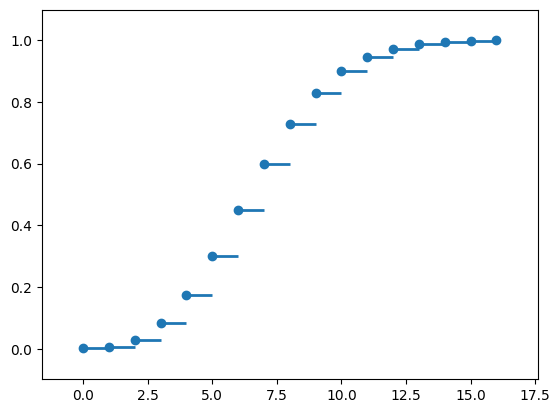

In [65]:
lc = mc.LineCollection(my_list_cdf, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
plt.plot(k, cdf, 'o')
ax.autoscale()
ax.margins(0.1)

### Aproximación de la Binomial a la Poisson

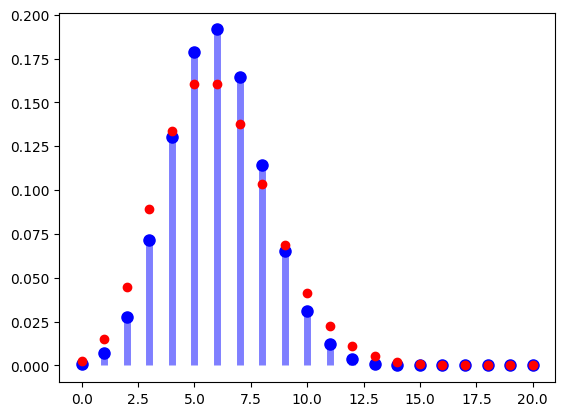

In [107]:
n, p = 20, 0.3
x = np.arange(0,n+1)

pmf = poisson.pmf(x, mu=n*p)

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plt.plot(x, pmf,'ro')

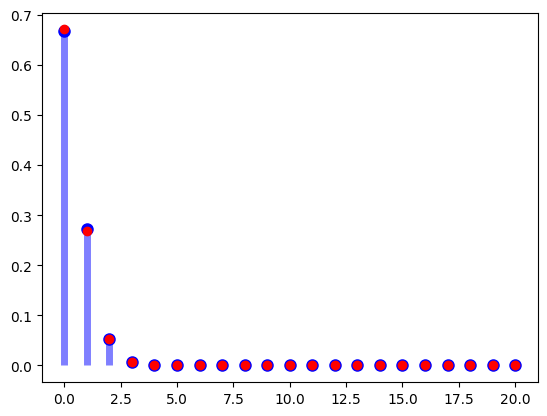

In [108]:
n, p = 20, 0.02
x = np.arange(0,n+1)

pmf = poisson.pmf(x, mu=n*p)

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plt.plot(x, pmf,'ro')

# Variables aleatorias continuas

## Distribucion Uniforme

### Función de Densidad (Probability Density Function, PDF)

In [2]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

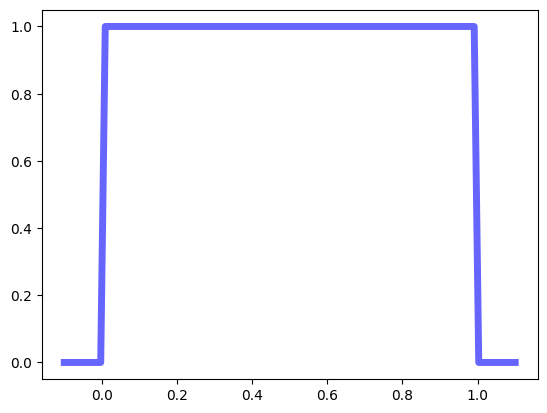

In [19]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-0.1,1.1, 100)
ax.plot(x, uniform.pdf(x),'b-', lw=5, alpha=0.6, label='uniform pdf')

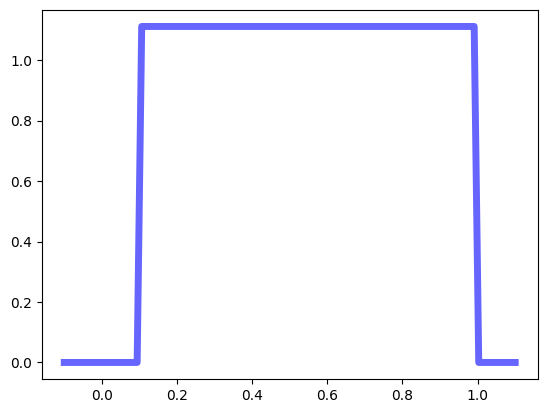

In [21]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-0.1,1.1, 100)
ax.plot(x, uniform.pdf(x,0.1,0.9),'b-', lw=5, alpha=0.6, label='uniform pdf')

### Función de Distribución

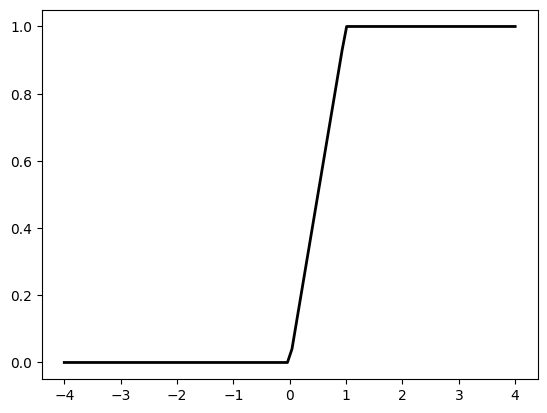

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.cdf(x), 'k-', lw=2, label='frozen pdf')

## Distribución Gaussiana

### Función de Densidad (Probability Density Function, PDF)

In [23]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

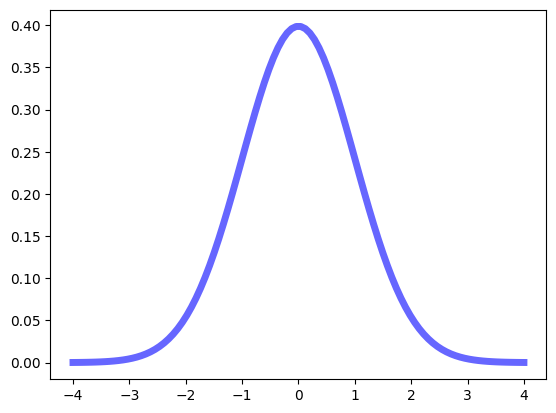

In [31]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4, 4, 100)
ax.plot(x, norm.pdf(x),'b-', lw=5, alpha=0.6, label='norm pdf')

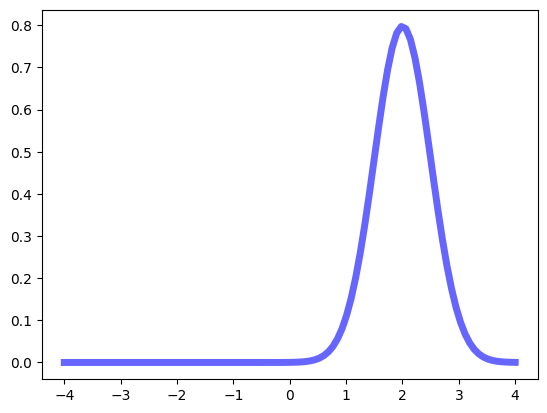

In [33]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4, 4, 100)
ax.plot(x, norm.pdf(x, loc=2, scale=0.5),'b-', lw=5, alpha=0.6, label='norm pdf')

### Función de Distribución

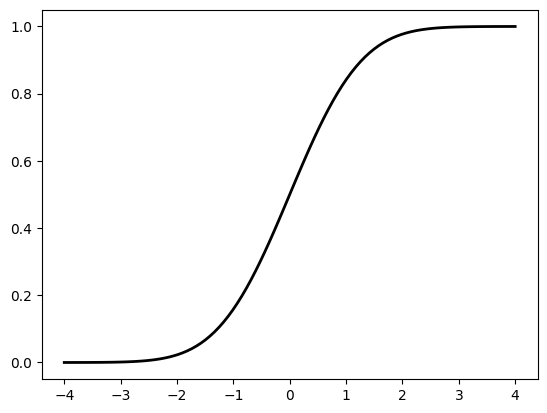

In [36]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.cdf(x), 'k-', lw=2, label='frozen pdf')

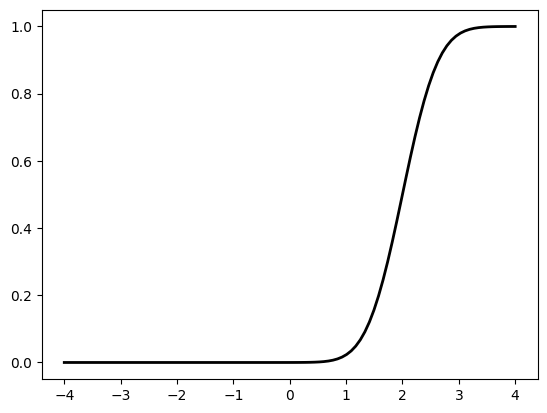

In [37]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.cdf(x,loc=2,scale=0.5), 'k-', lw=2, label='frozen pdf')

## Distribución Exponencial

### Función de Densidad (Probability Density Function, PDF)

In [40]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

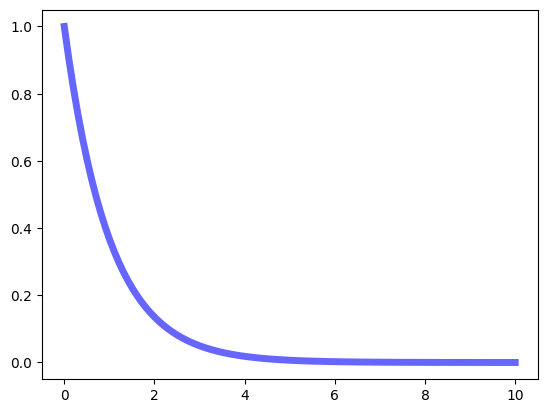

In [48]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 10, 100)
ax.plot(x, expon.pdf(x), 'b-', lw=5, alpha=0.6, label='expon pdf')

scale = 1 / lambda

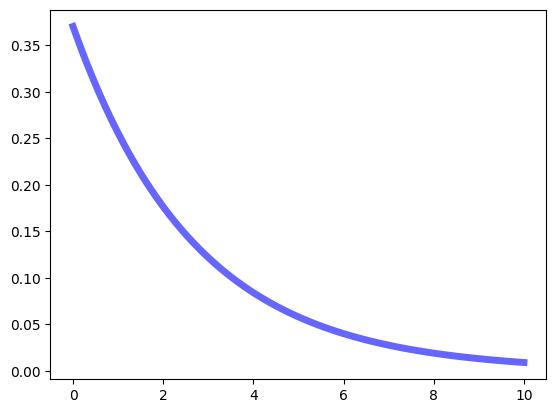

In [50]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 10, 100)
ax.plot(x, expon.pdf(x,scale=2.7), 'b-', lw=5, alpha=0.6, label='expon pdf')

### Función de Distribución

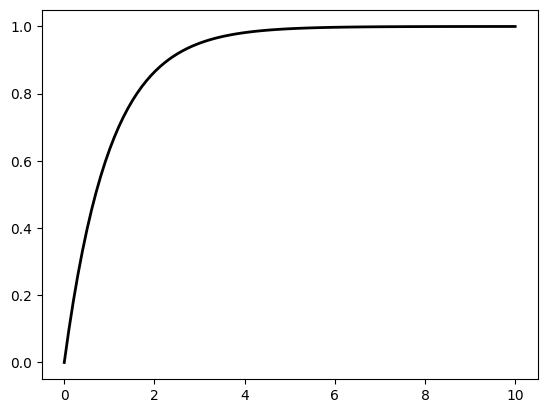

In [52]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.cdf(x), 'k-', lw=2)

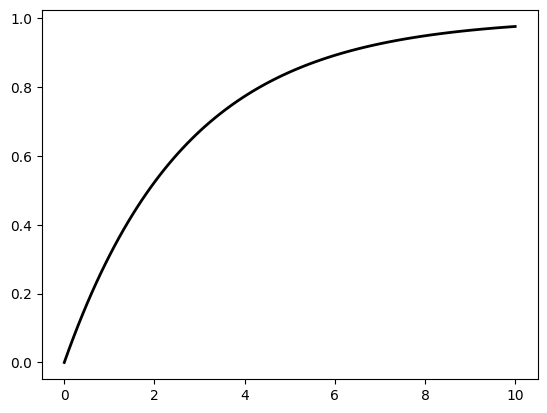

In [53]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.cdf(x,scale=2.7), 'k-', lw=2)